In [44]:
from single_cell.workflows.pseudo_bulk_qc.scripts.single_cell_qc_plots import qc_plots, load_qc_data
from parser import SvVcfData
from single_cell.utils.csvutils import IrregularCsvInput, CsvOutput
import pandas as pd
import wgs_analysis.plots.rearrangement
import matplotlib.pyplot as plt
import seaborn
from  scgenome.cnplot import plot_cell_cn_profile
from dlp_qc_utils.concordance.sv_hmm_concordance import get_cna_changepoints, flatten_matched_breakpoints,get_discordant_svs, get_concordance,split_concordance,read_matched_data, check_changepoints_against_matches, get_concordant_svs
from dlp_qc_utils.plots.breakpoint_plots import plot
import matplotlib.backends.backend_pdf

%matplotlib inline


In [2]:

def get_brknd_halves(sv):
    out = pd.DataFrame({"chromosome":[], "position":[], "type":[], "prediction_id":[]})
    out["chromosome"] = sv.chromosome_1.tolist() + sv.chromosome_2.tolist()
    out["position"] = sv.position_1.tolist() + sv.position_2.tolist()
    out["rearrangement_type"] = sv.type.tolist() + sv.type.tolist()
    out["prediction_id"] = sv.index.tolist() + sv.index.tolist()
    out = out.astype({"chromosome":"str"})
    return out
    
    
def parse(sv):
    matches, non_matches = split_concordance(sv, csv=True)
    return get_brknd_halves(matches),  get_brknd_halves(non_matches)


In [3]:


##load data

sample_id = "SA1256PP"
library_id = "A108838B"
annotation_metrics= "/juno/work/shah/tantalus/SC-3803/results/annotation/A108838B_metrics.csv.gz"
hmmcopy_reads = "/juno/work/shah/tantalus/SC-3803/results/hmmcopy/A108838B_reads.csv.gz"
hmmcopy_segs = "/juno/work/shah/tantalus/SC-3803/results/hmmcopy/A108838B_segments.csv.gz"
hmmcopy_metrics = "/juno/work/shah/tantalus/SC-3803/results/hmmcopy/A108838B_hmmcopy_metrics.csv.gz"
alignment_metrics = "/juno/work/shah/tantalus/SC-3803/results/align/A108838B_alignment_metrics.csv.gz"
gc_metrics = "/juno/work/shah/tantalus/SC-3803/results/align/A108838B_gc_metrics.csv.gz"
destruct_breakpoint_annotation = "/juno/work/shah/tantalus/SC-3803/results/breakpoint_calling/sample_SA1256PP/destruct_breakpoints.csv.gz"
destruct_breakpoint_count = "/juno/work/shah/tantalus/SC-3803/results/breakpoint_calling/sample_SA1256PP/destruct_cell_counts.csv.gz"


dtypes={
    'chromosome_1': int,
    'position_1': int,
    'chromosome_2': int,
    'position_2': int,
    'strand_1': int,
    'strand_2': int,
    'type': str,
    'caller': str,
    'breakpoint_id': str,
    'grouped_breakpoint_id': str
}

metrics_data, cn_data_filt = load_qc_data(
        sample_id, annotation_metrics, hmmcopy_reads,
        hmmcopy_segs, hmmcopy_metrics, alignment_metrics, gc_metrics)
cn_data_filt = cn_data_filt.dropna()

changepoints = get_cna_changepoints(cn_data_filt)



/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scgenome-0.0.1-py3.6.egg/scgenome/loaders/align.py:114: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dtypes_override = yaml.load(open(dtypes_filename))
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scgenome-0.0.1-py3.6.egg/scgenome/loaders/align.py:119: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dtypes_override = yaml.load(open(dtypes_filename))
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scgenome-0.0.1-py3.6.egg/scgenome/loaders/hmmcopy.py:160: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dtypes_override = ya

In [71]:

cons_primary = get_concordance("/juno/work/shah/users/grewald/SVBENCH2/primary_only/consensus_concordance/consensus.csv.gz",changepoints, "cons_primary")
cons_raw =get_concordance("/juno/work/shah/users/grewald/SVBENCH2/rawdata/consensus_concordance/consensus.csv.gz",changepoints, "cons_raw")
cons_trim = get_concordance("/juno/work/shah/users/grewald/SVBENCH2/trimming/consensus_concordance/consensus.csv.gz",changepoints, "cons_trim")
cons_trim_primary = get_concordance("/juno/work/shah/users/grewald/SVBENCH2/trimming_primary_only/consensus_concordance/consensus.csv.gz",changepoints, "cons_trim_primary")

lumpy_primary="/juno/work/shah/users/grewald/SVBENCH2/primary_only/consensus_concordance/lumpy_parsed.csv.gz"
lumpy_primary = get_concordance(lumpy_primary,changepoints, "lumpy_primary")
lumpy_raw="/juno/work/shah/users/grewald/SVBENCH2/rawdata/consensus_concordance/lumpy_parsed.csv.gz"
lumpy_raw = get_concordance(lumpy_raw,changepoints, "lumpy_raw")
lumpy_trim="/juno/work/shah/users/grewald/SVBENCH2/trimming/consensus_concordance/lumpy_parsed.csv.gz"
lumpy_trim = get_concordance(lumpy_trim,changepoints, "lumpy_trim")
lumpy_trim_primary="/juno/work/shah/users/grewald/SVBENCH2/trimming_primary_only/consensus_concordance/lumpy_parsed.csv.gz"
lumpy_trim_primary = get_concordance(lumpy_trim_primary,changepoints, "lumpy_trim_primary")

svaba_primary="/juno/work/shah/users/grewald/SVBENCH2/primary_only/consensus_concordance/svaba_parsed.csv.gz"
svaba_primary = get_concordance(svaba_primary,changepoints, "svaba_primary")
svaba_raw="/juno/work/shah/users/grewald/SVBENCH2/rawdata/consensus_concordance/svaba_parsed.csv.gz"
svaba_raw = get_concordance(svaba_raw,changepoints,  "svaba_raw")
svaba_trim="/juno/work/shah/users/grewald/SVBENCH2/trimming/consensus_concordance/svaba_parsed.csv.gz"
svaba_trim = get_concordance(svaba_trim,changepoints, "svaba_trim")
svaba_trim_primary="/juno/work/shah/users/grewald/SVBENCH2/trimming_primary_only/consensus_concordance/svaba_parsed.csv.gz"
svaba_trim_primary = get_concordance(svaba_trim_primary,changepoints, "svaba_trim_primary")

gridss_primary="/juno/work/shah/users/grewald/SVBENCH2/primary_only/consensus_concordance/gridss_parsed.csv.gz"
gridss_primary = get_concordance(gridss_primary,changepoints, "gridss_primary")
gridss_raw="/juno/work/shah/users/grewald/SVBENCH2/rawdata/consensus_concordance/gridss_parsed.csv.gz"
gridss_raw = get_concordance(gridss_raw,changepoints, "gridss_raw")
gridss_trim="/juno/work/shah/users/grewald/SVBENCH2/trimming/consensus_concordance/gridss_parsed.csv.gz"
gridss_trim = get_concordance(gridss_trim,changepoints, "gridss_trim")
gridss_trim_primary="/juno/work/shah/users/grewald/SVBENCH2/trimming_primary_only/consensus_concordance/gridss_parsed.csv.gz"
gridss_trim_primary = get_concordance(gridss_trim_primary,changepoints, "gridss_trim_primary")

destruct_primary=get_concordance("/juno/work/shah/users/grewald/SVBENCH2/primary_only/wgs/output/breakpoints/SA1256PP/SA1256PP_destruct_breakpoints.csv.gz",changepoints, "destruct_primary")
destruct_raw=get_concordance("/juno/work/shah/users/grewald/SVBENCH2/rawdata/wgs/output/breakpoints/SA1256PP/SA1256PP_destruct_breakpoints.csv.gz",changepoints, "destruct_raw")
destruct_trim_primary=get_concordance("/juno/work/shah/users/grewald/SVBENCH2/trimming_primary_only/wgs/output/breakpoints/SA1256PP/SA1256PP_destruct_breakpoints.csv.gz",changepoints, "destruct_trim_primary")
destruct_trim=get_concordance("/juno/work/shah/users/grewald/SVBENCH2/trimming/wgs/output/breakpoints/SA1256PP/SA1256PP_destruct_breakpoints.csv.gz",changepoints, "destruct_trim")

HMM-concordant: 5/547, 0.9140767824497258%


KeyboardInterrupt: 

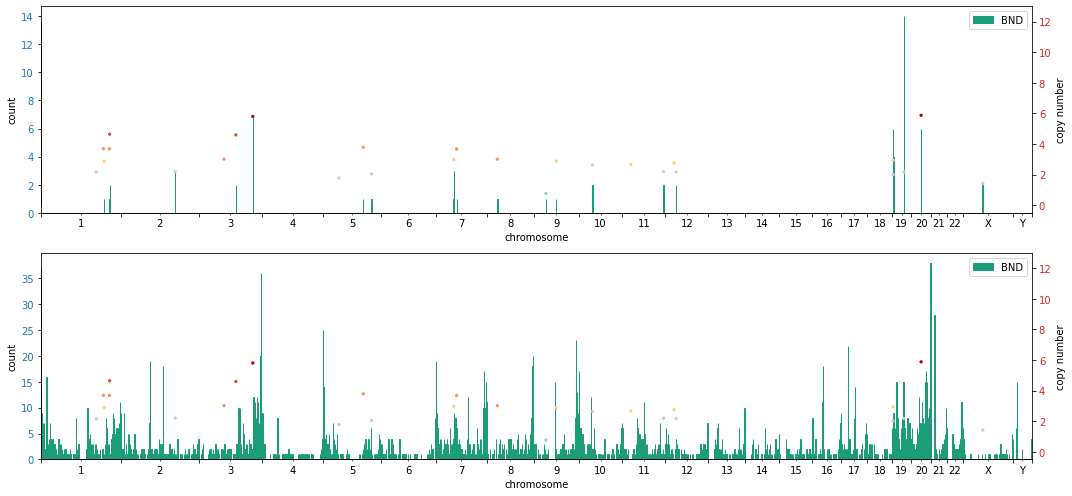

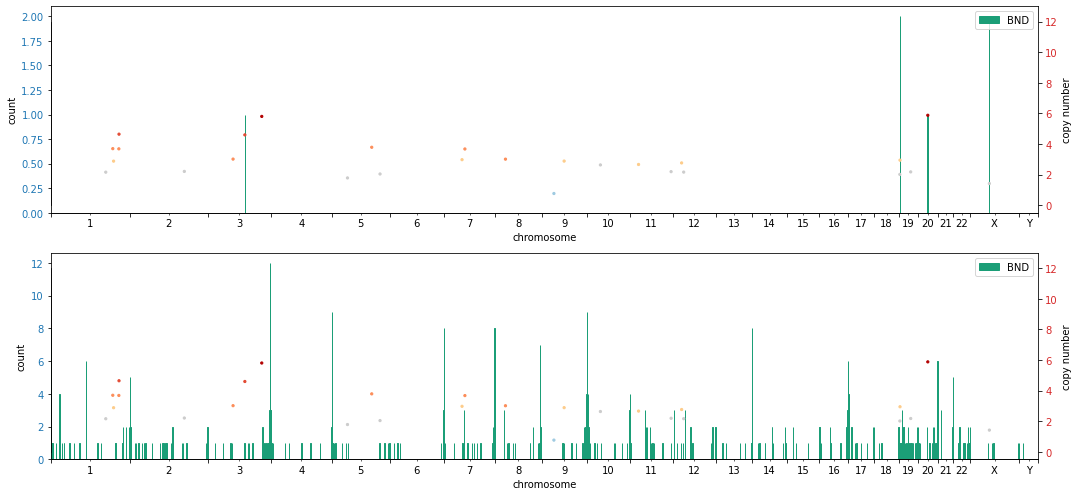

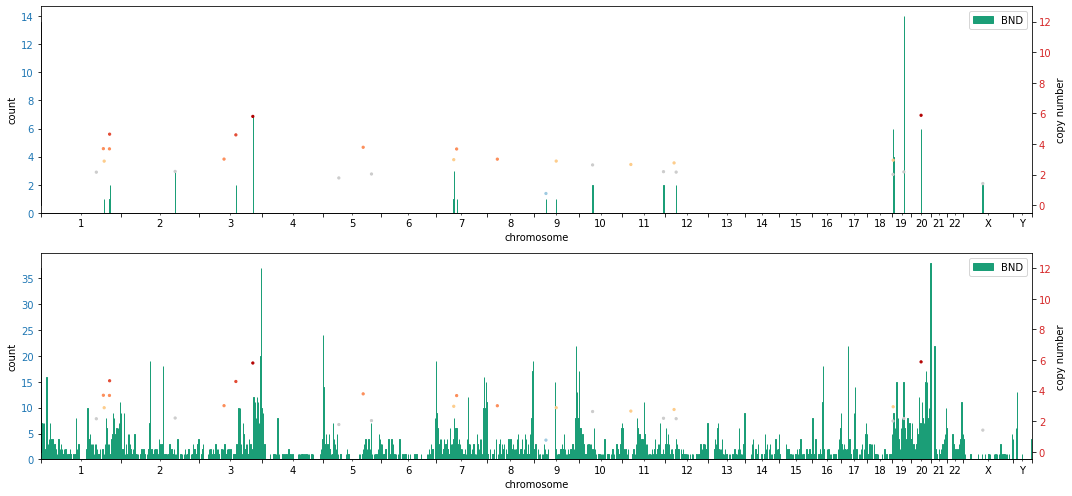

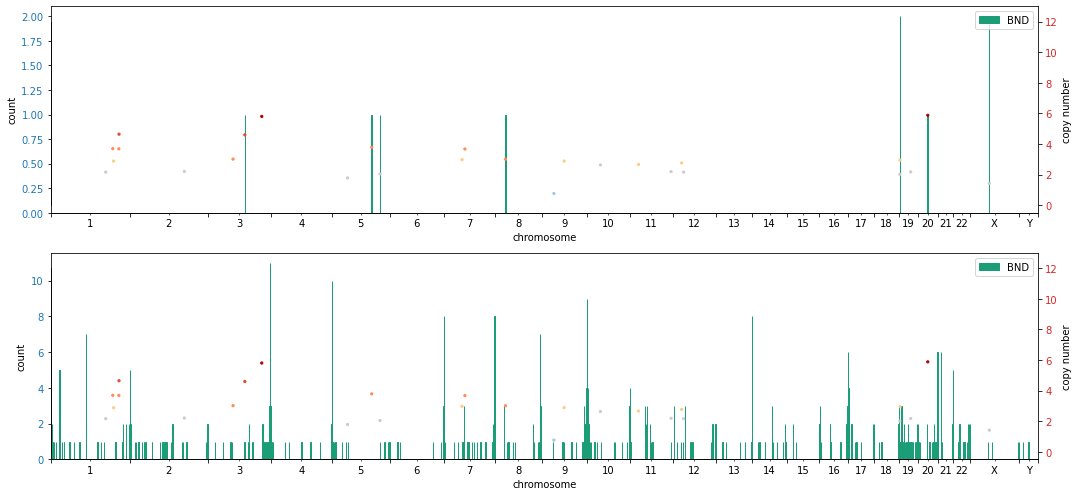

In [4]:

svaba_primary_matches, svaba_primary_non_matches = parse("svaba_primary")
svaba_trim_matches, svaba_trim_non_matches = parse("svaba_trim")
svaba_raw_matches, svaba_raw_non_matches = parse("svaba_raw")
svaba_trim_primary_matches, svaba_trim_primary_non_matches = parse("svaba_trim_primary")

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], svaba_primary_matches, changepoints)
plot(ax[1], svaba_primary_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], svaba_trim_matches, changepoints)
plot(ax[1], svaba_trim_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], svaba_raw_matches, changepoints)
plot(ax[1], svaba_raw_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], svaba_trim_primary_matches, changepoints)
plot(ax[1], svaba_trim_primary_non_matches,changepoints)
f.tight_layout()


/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


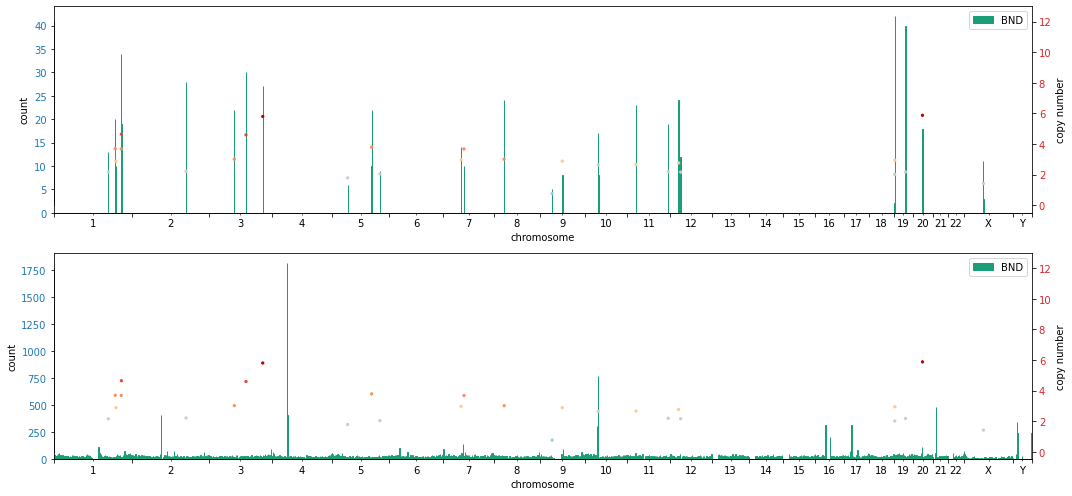

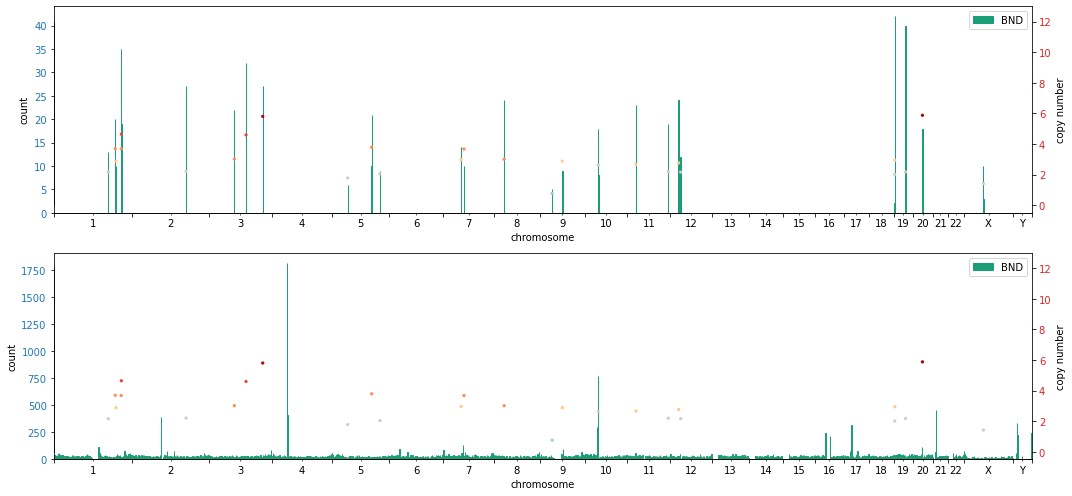

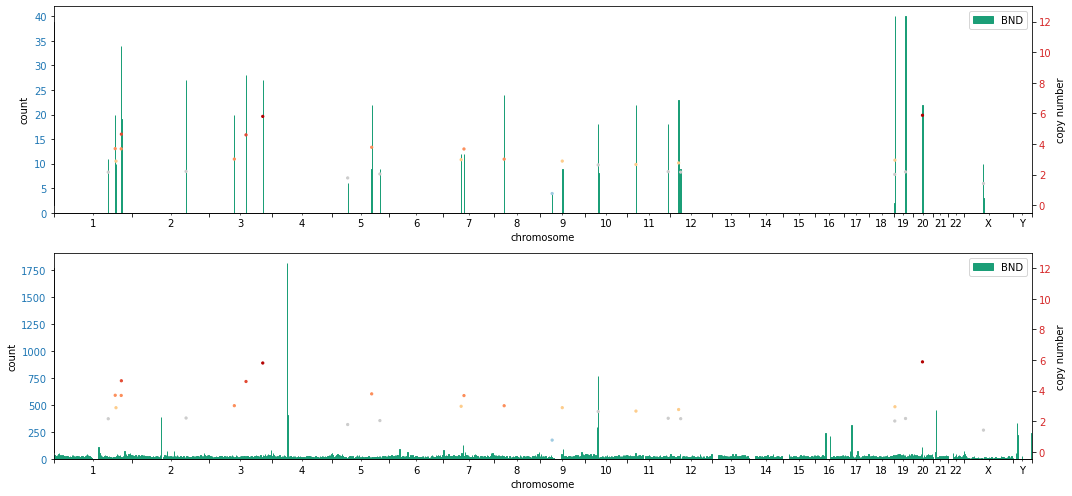

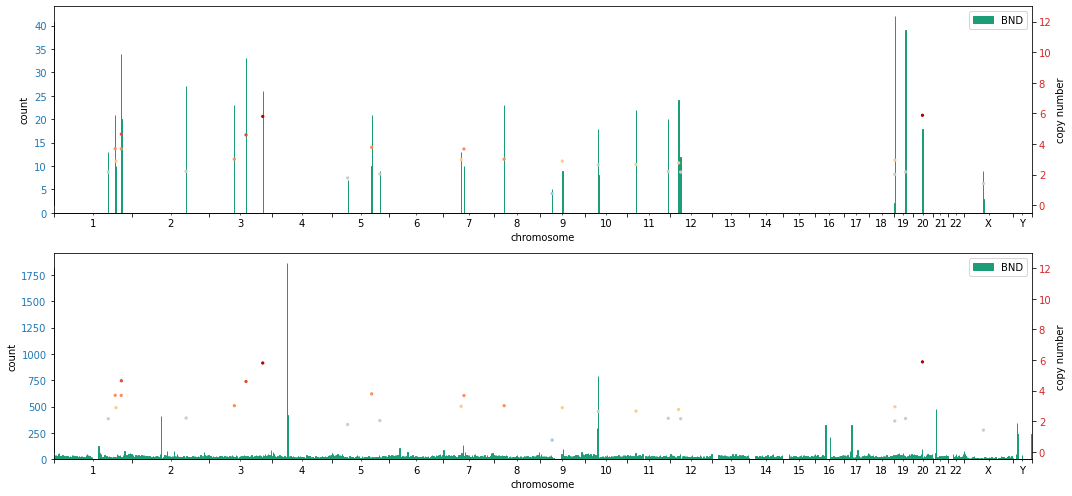

In [8]:

gridss_primary_matches, gridss_primary_non_matches = parse("gridss_primary")
gridss_trim_matches, gridss_trim_non_matches = parse("gridss_trim")
gridss_raw_matches, gridss_raw_non_matches = parse("gridss_raw")
gridss_trim_primary_matches, gridss_trim_primary_non_matches = parse("gridss_trim_primary")

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], gridss_primary_matches, changepoints)
plot(ax[1], gridss_primary_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], gridss_trim_matches, changepoints)
plot(ax[1], gridss_raw_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], gridss_raw_matches, changepoints)
plot(ax[1], gridss_raw_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], gridss_trim_primary_matches, changepoints)
plot(ax[1], gridss_trim_primary_non_matches,changepoints)
f.tight_layout()



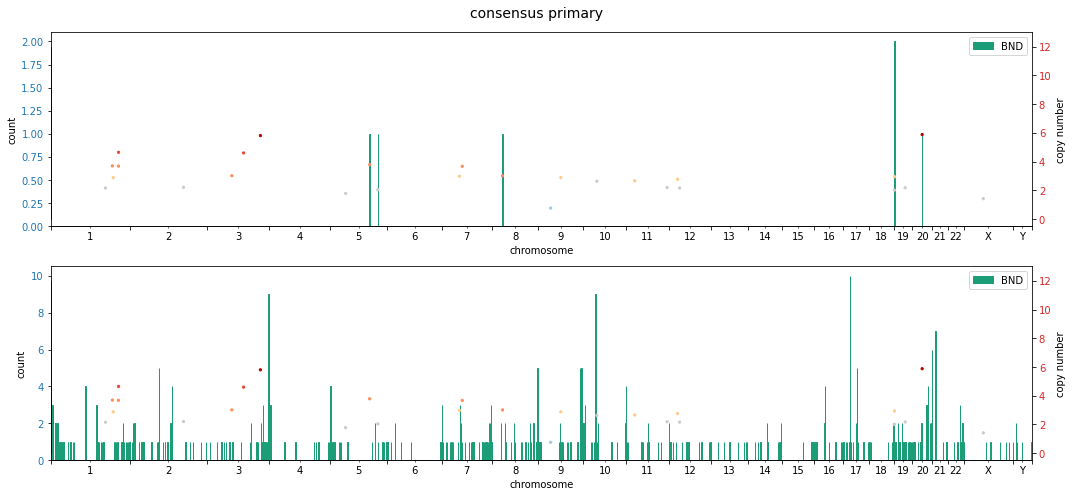

In [50]:
cons_primary_matches, cons_primary_non_matches = parse("cons_primary")
cons_trim_matches, cons_trim_non_matches = parse("cons_trim")
cons_raw_matches, cons_raw_non_matches = parse("cons_raw")
cons_trim_primary_matches, cons_trim_primary_non_matches = parse("cons_trim_primary")

pdf = matplotlib.backends.backend_pdf.PdfPages("destruct_type_size.pdf")


f, ax = plt.subplots(2, 1, figsize=(15, 7))
f.suptitle("consensus primary", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.88)
plot(ax[0], cons_primary_matches, changepoints)
plot(ax[1], cons_primary_non_matches,changepoints)
f.tight_layout()
pdf.savefig(f)

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], cons_trim_matches, changepoints)
plot(ax[1], cons_trim_non_matches,changepoints)
f.tight_layout()
pdf.savefig(f)

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], cons_raw_matches, changepoints)
plot(ax[1], cons_raw_non_matches,changepoints)
f.tight_layout()
pdf.savefig(f)

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], cons_trim_primary_matches, changepoints)
plot(ax[1], cons_trim_primary_non_matches,changepoints)
f.tight_layout()
pdf.savefig(f)

pdf.close()


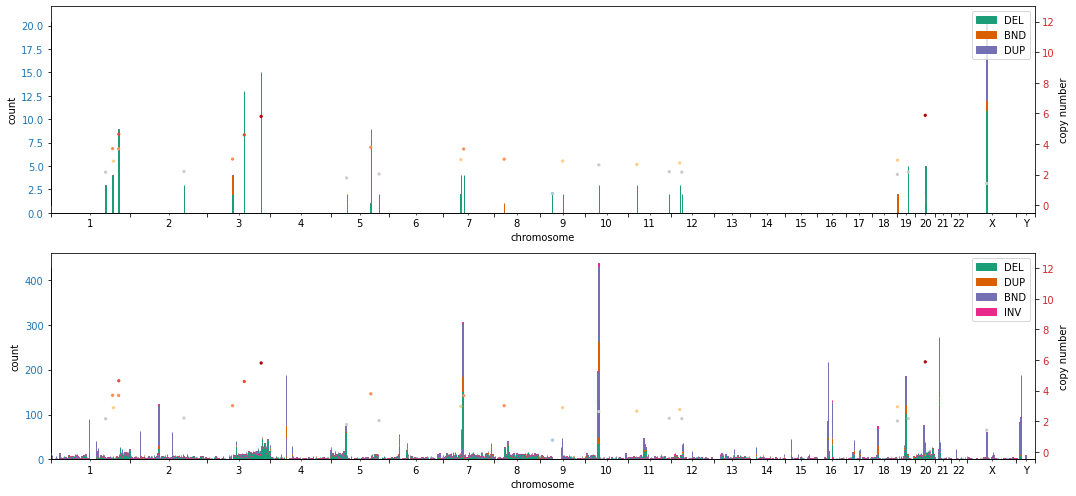

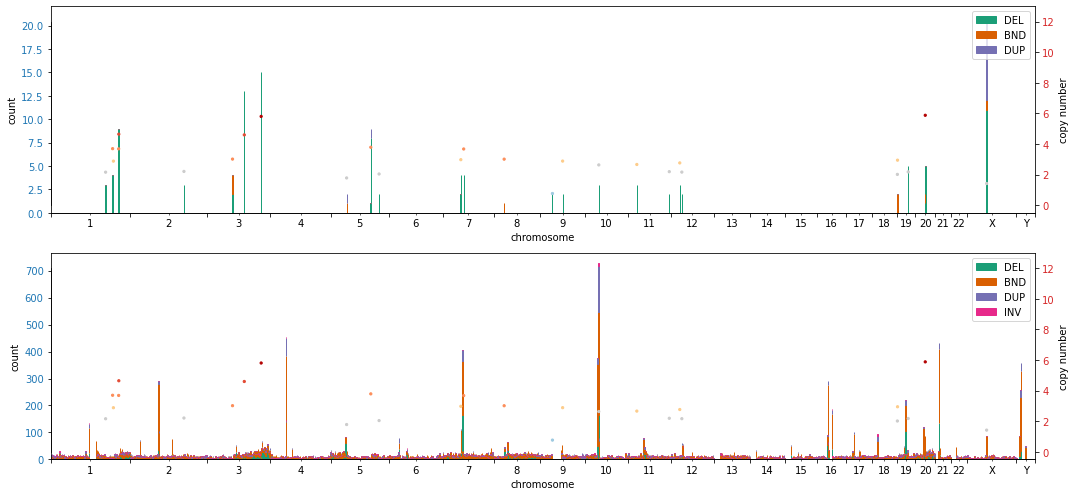

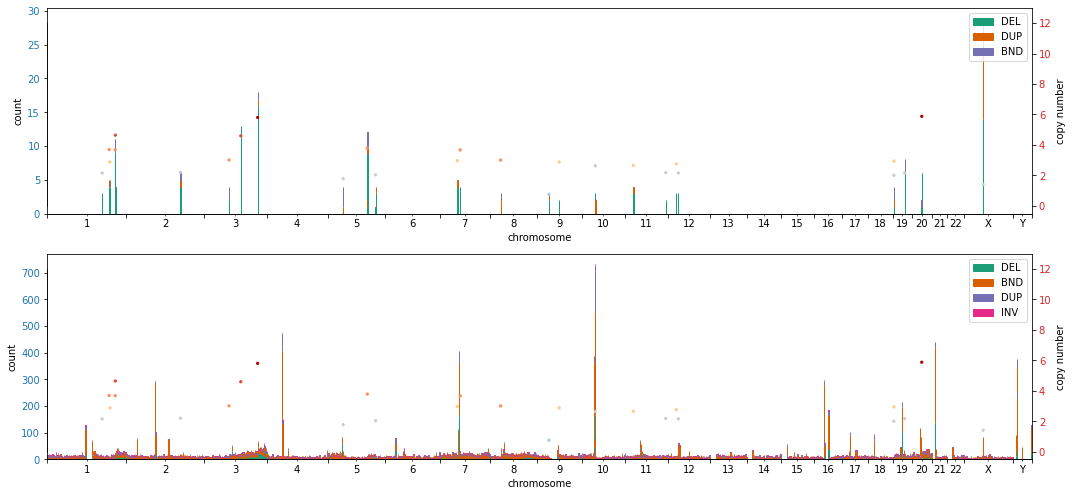

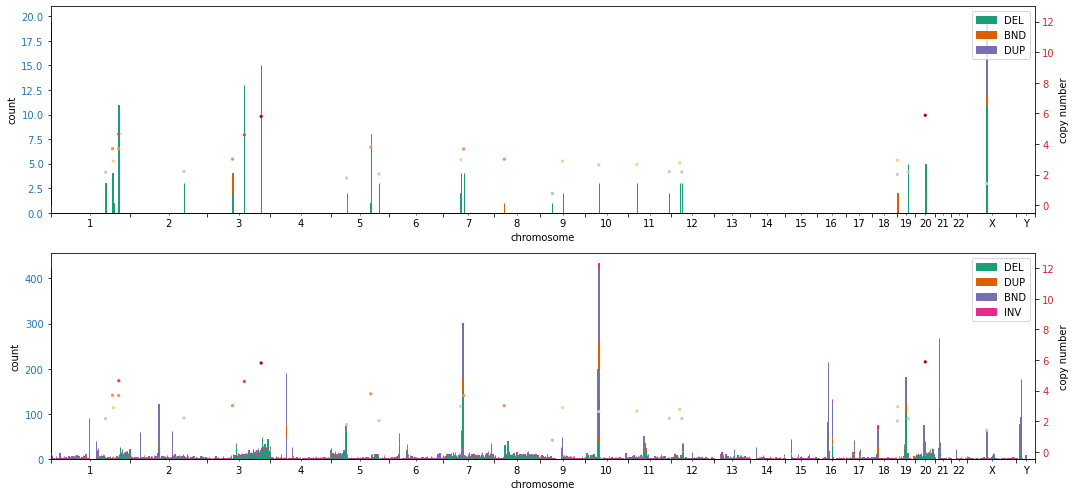

In [6]:

lumpy_primary_matches, lumpy_primary_non_matches = parse("lumpy_primary")
lumpy_trim_matches, lumpy_trim_non_matches = parse("lumpy_trim")
lumpy_raw_matches, lumpy_raw_non_matches = parse("lumpy_raw")
lumpy_trim_primary_matches, lumpy_trim_primary_non_matches = parse("lumpy_trim_primary")

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], lumpy_primary_matches, changepoints)
plot(ax[1], lumpy_primary_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], lumpy_primary_matches, changepoints)
plot(ax[1], lumpy_trim_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], lumpy_raw_matches, changepoints)
plot(ax[1], lumpy_raw_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], lumpy_trim_primary_matches, changepoints)
plot(ax[1], lumpy_trim_primary_non_matches,changepoints)
f.tight_layout()


Empty DataFrame
Columns: [chromosome, position, type, prediction_id, rearrangement_type]
Index: []


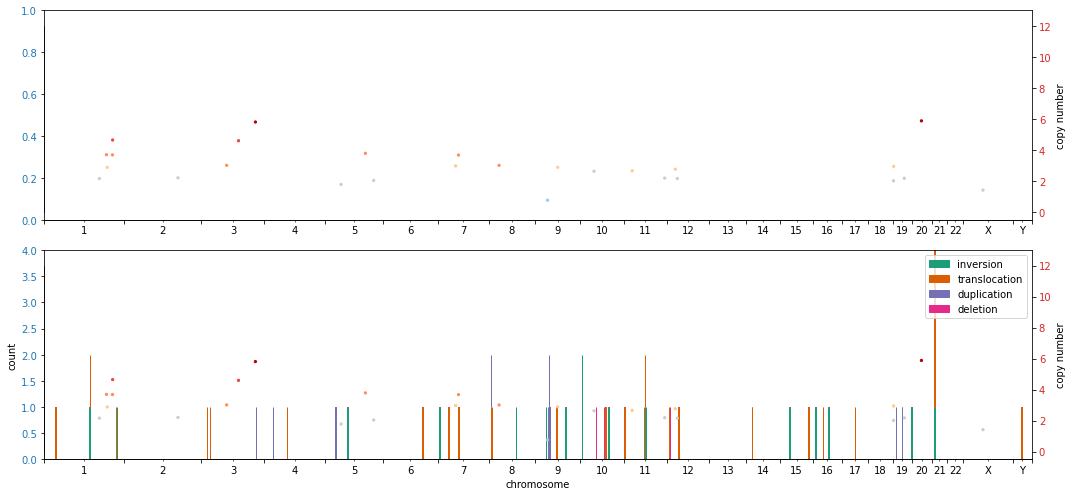

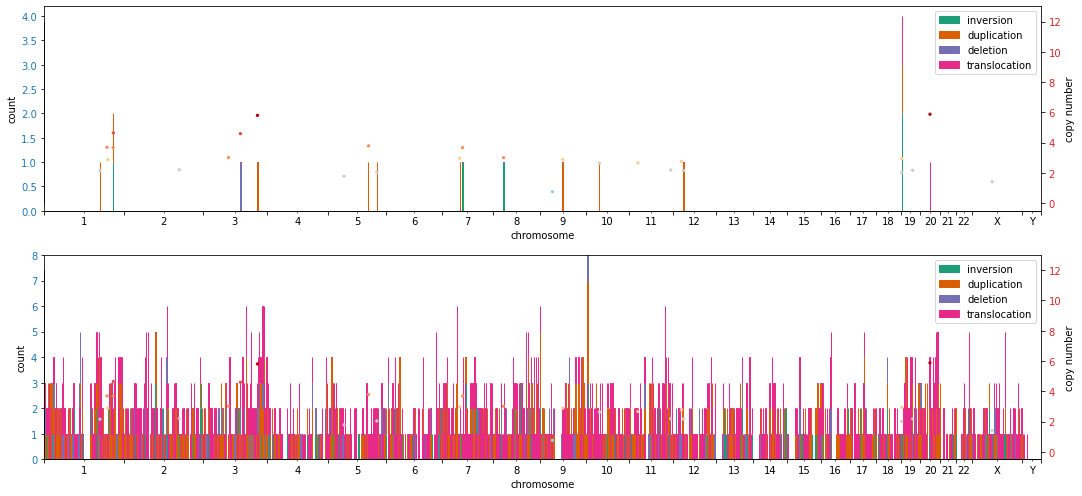

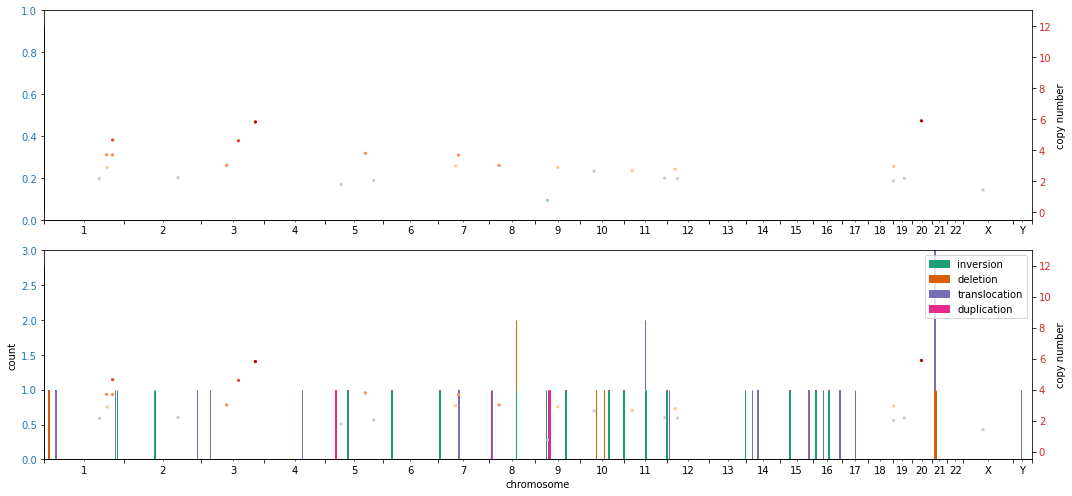

In [ ]:

destruct_primary_matches, destruct_primary_non_matches = parse("destruct_primary")
destruct_trim_matches, destruct_trim_non_matches = parse("destruct_trim")
destruct_raw_matches, destruct_raw_non_matches = parse("destruct_raw")
destruct_trim_primary_matches, destruct_trim_primary_non_matches = parse("destruct_trim_primary")

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], destruct_primary_matches, changepoints)
plot(ax[1], destruct_primary_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], destruct_trim_matches, changepoints)
plot(ax[1], destruct_trim_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], destruct_raw_matches, changepoints)
plot(ax[1], destruct_raw_non_matches,changepoints)
f.tight_layout()

f, ax = plt.subplots(2, 1, figsize=(15, 7))
plot(ax[0], destruct_trim_primary_matches, changepoints)
plot(ax[1], destruct_trim_primary_non_matches,changepoints)
f.tight_layout()

In [4]:
check_changepoints_against_matches("cons_raw", changepoints, csv=True)
check_changepoints_against_matches("cons_primary", changepoints, csv=True)
check_changepoints_against_matches("cons_trim", changepoints, csv=True)
check_changepoints_against_matches("cons_trim_primary", changepoints, csv=True)

517
547
288
259


<function dlp_qc_utils.concordance.sv_hmm_concordance.match_changepoints>

In [5]:


check_changepoints_against_matches("lumpy_raw", changepoints, csv=True)
check_changepoints_against_matches("lumpy_primary", changepoints, csv=True)
check_changepoints_against_matches("lumpy_trim", changepoints, csv=True)
check_changepoints_against_matches("lumpy_trim_primary", changepoints, csv=True)

29987
16030
29616
15800


<function dlp_qc_utils.concordance.sv_hmm_concordance.match_changepoints>

In [6]:


check_changepoints_against_matches("svaba_raw", changepoints, csv=True)
check_changepoints_against_matches("svaba_primary", changepoints, csv=True)
check_changepoints_against_matches("svaba_trim", changepoints, csv=True)
check_changepoints_against_matches("svaba_trim_primary", changepoints, csv=True)

4321
4391
524
546


<function dlp_qc_utils.concordance.sv_hmm_concordance.match_changepoints>

In [7]:


check_changepoints_against_matches("gridss_raw", changepoints, csv=True)
check_changepoints_against_matches("gridss_primary", changepoints, csv=True)
check_changepoints_against_matches("gridss_trim", changepoints, csv=True)
check_changepoints_against_matches("gridss_trim_primary", changepoints, csv=True)

/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


76319
77930
78336
78165


<function dlp_qc_utils.concordance.sv_hmm_concordance.match_changepoints>

In [8]:
check_changepoints_against_matches("destruct_raw", changepoints, csv=True)
check_changepoints_against_matches("destruct_primary", changepoints, csv=True)
check_changepoints_against_matches("destruct_trim", changepoints, csv=True)
check_changepoints_against_matches("destruct_trim_primary", changepoints, csv=True)

32
39
2272
2415


<function dlp_qc_utils.concordance.sv_hmm_concordance.match_changepoints>

  group column  val
0    g1     c1   10
1    g1     c2   12
2    g1     c3   13
3    g2     c1    8
4    g2     c2   10
5    g2     c3   12


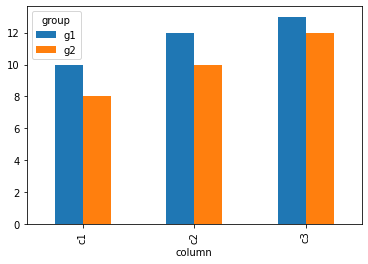

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame([['g1','c1',10],['g1','c2',12],['g1','c3',13],['g2','c1',8],
                   ['g2','c2',10],['g2','c3',12]],columns=['group','column','val'])

df.pivot("column", "group", "val").plot(kind='bar')
print(df)
plt.show()

/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


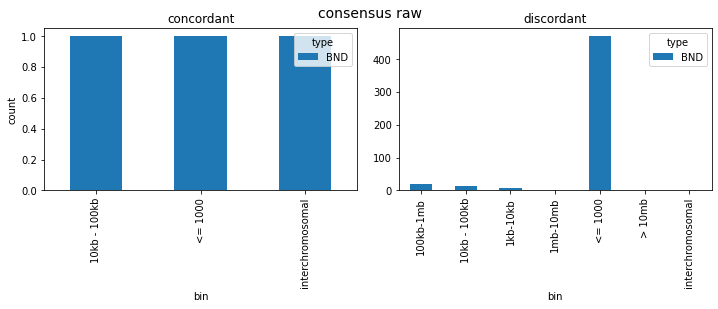

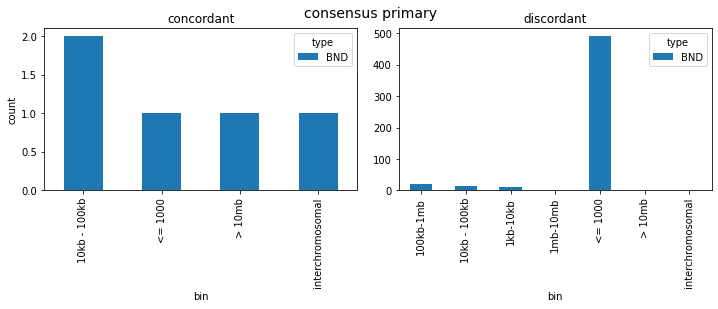

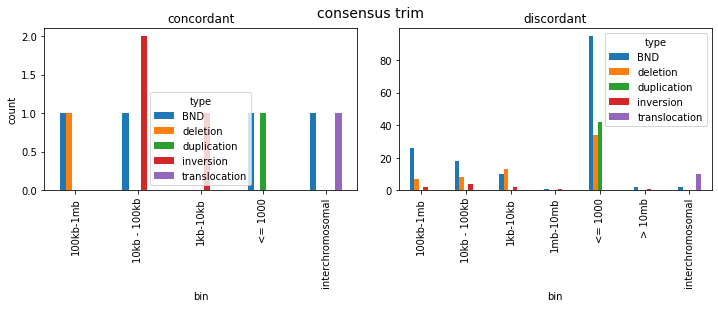

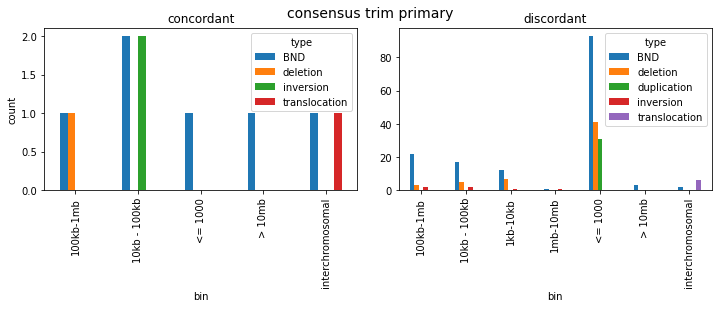

In [34]:
pdf = matplotlib.backends.backend_pdf.PdfPages("consensus_type_size.pdf")
f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("cons_raw", ax[0], ax[1], f, title="consensus raw")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("cons_primary", ax[0], ax[1], f, title="consensus primary")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("cons_trim", ax[0], ax[1], f, title="consensus trim")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("cons_trim_primary", ax[0], ax[1], f, title="consensus trim primary")
pdf.savefig(f)

pdf.close()


/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


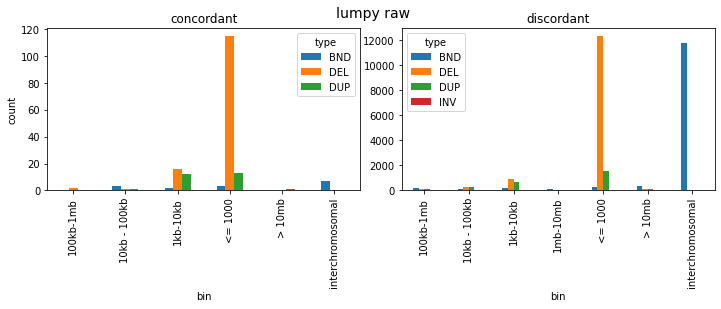

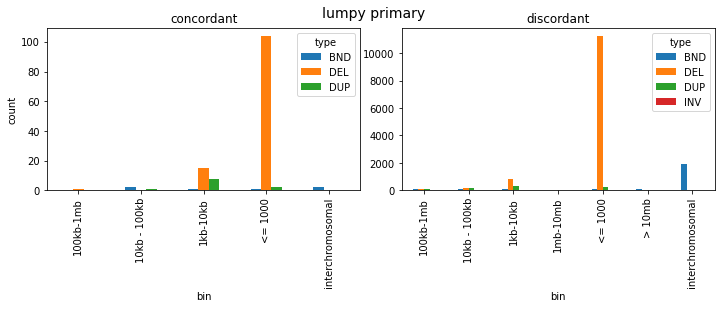

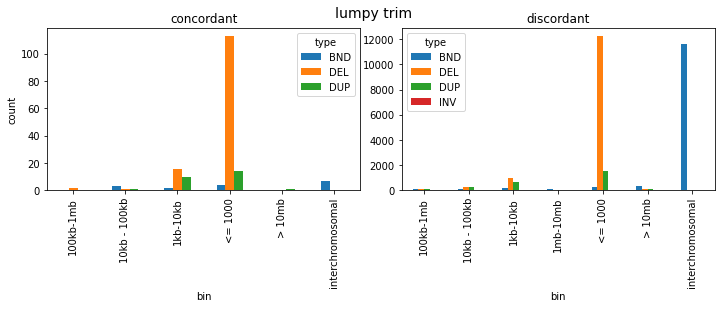

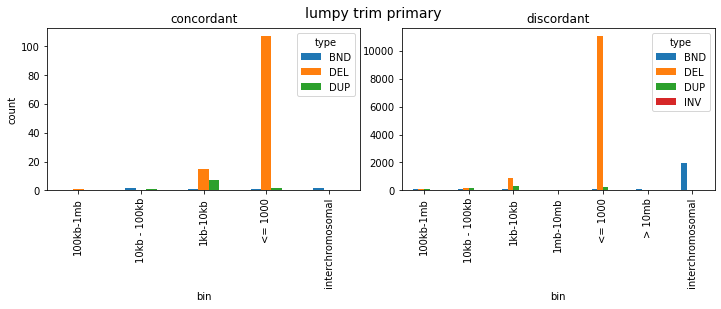

In [35]:
pdf = matplotlib.backends.backend_pdf.PdfPages("lumpy_type_size.pdf")
f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("lumpy_raw", ax[0], ax[1], f, title="lumpy raw")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("lumpy_primary", ax[0], ax[1], f, title="lumpy primary")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("lumpy_trim", ax[0], ax[1], f, title="lumpy trim")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("lumpy_trim_primary", ax[0], ax[1], f, title="lumpy trim primary")
pdf.savefig(f)

pdf.close()


/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


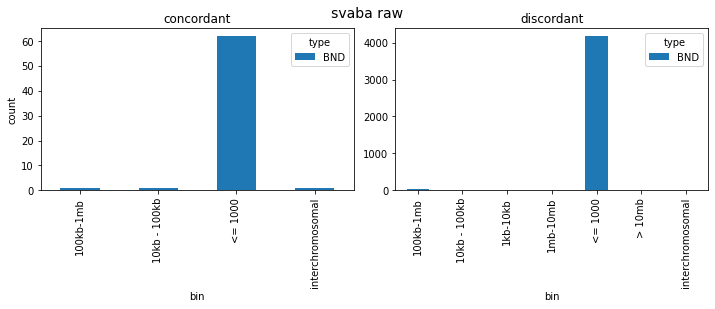

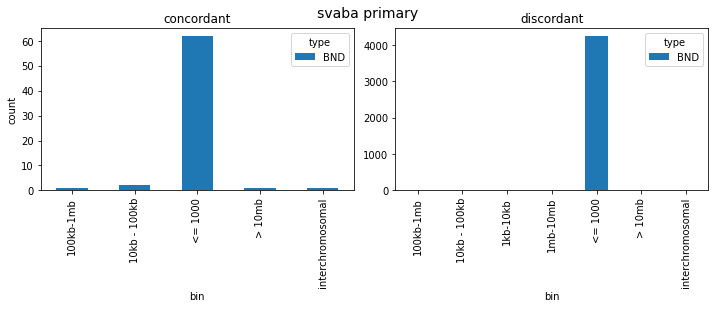

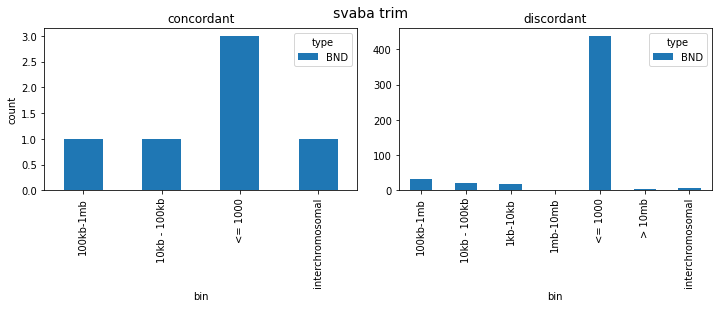

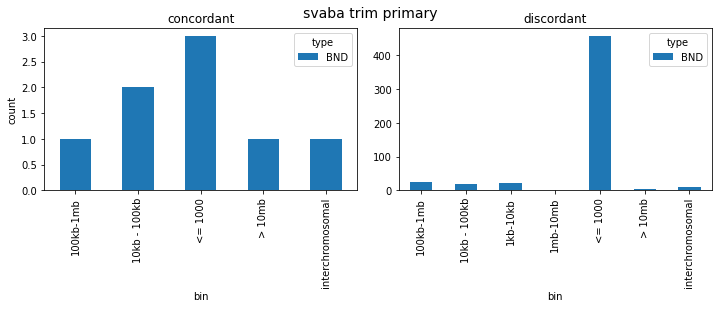

In [36]:
pdf = matplotlib.backends.backend_pdf.PdfPages("svaba_type_size.pdf")
f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("svaba_raw", ax[0], ax[1], f, title="svaba raw")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("svaba_primary", ax[0], ax[1], f, title="svaba primary")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("svaba_trim", ax[0], ax[1], f, title="svaba trim")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("svaba_trim_primary", ax[0], ax[1], f, title="svaba trim primary")
pdf.savefig(f)

pdf.close()


/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

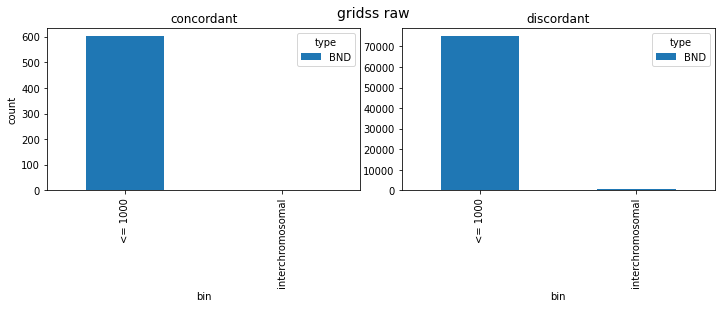

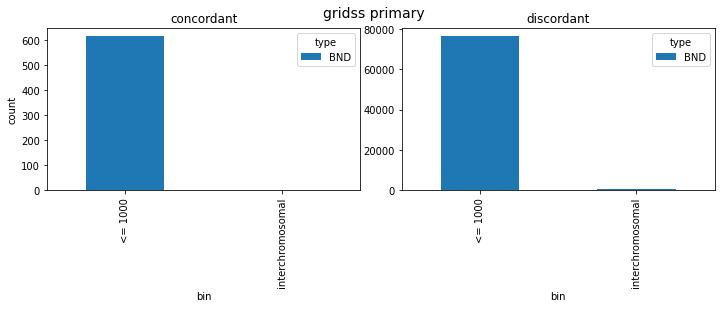

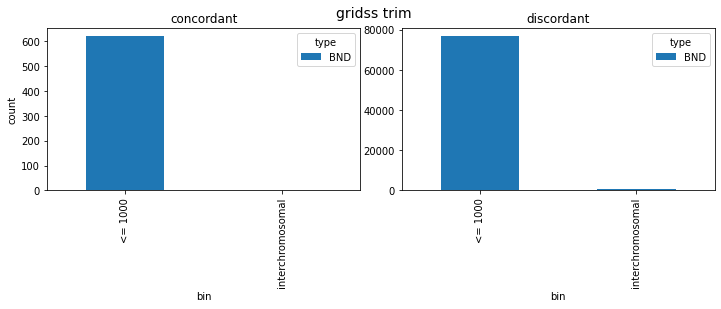

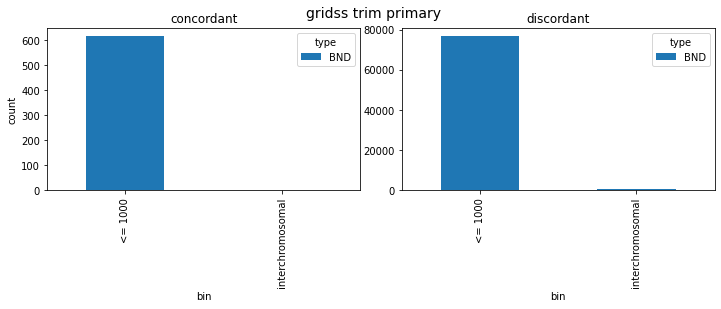

In [37]:
pdf = matplotlib.backends.backend_pdf.PdfPages("gridss_type_size.pdf")
f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("gridss_raw", ax[0], ax[1], f, title="gridss raw")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("gridss_primary", ax[0], ax[1], f, title="gridss primary")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("gridss_trim", ax[0], ax[1], f, title="gridss trim")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("gridss_trim_primary", ax[0], ax[1], f, title="gridss trim primary")
pdf.savefig(f)

pdf.close()


32
39
2272


/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2415


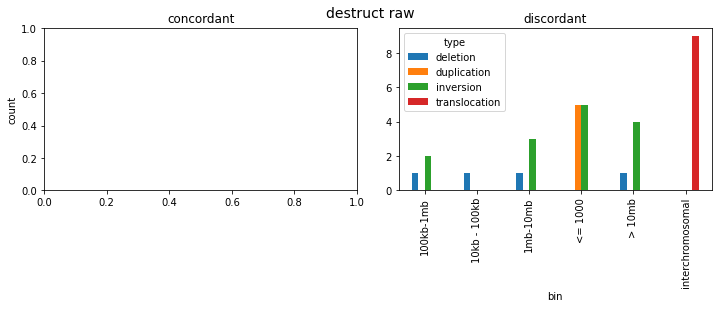

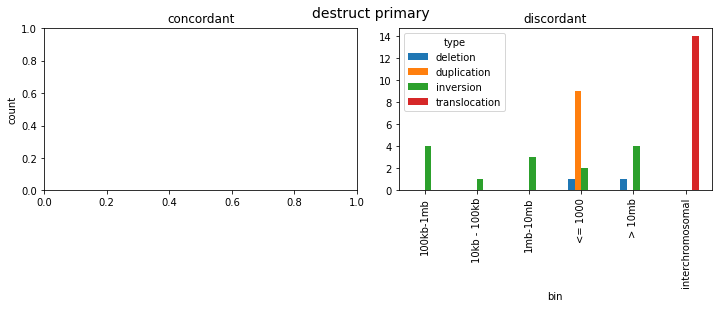

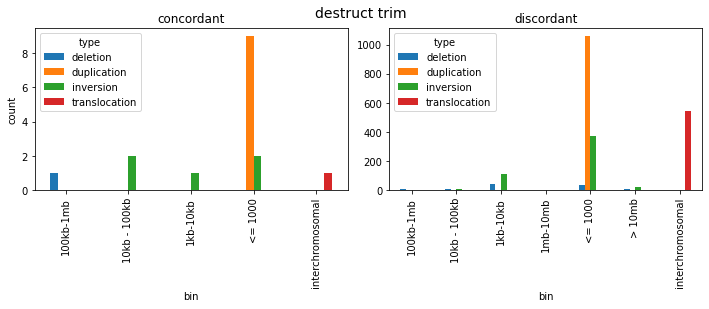

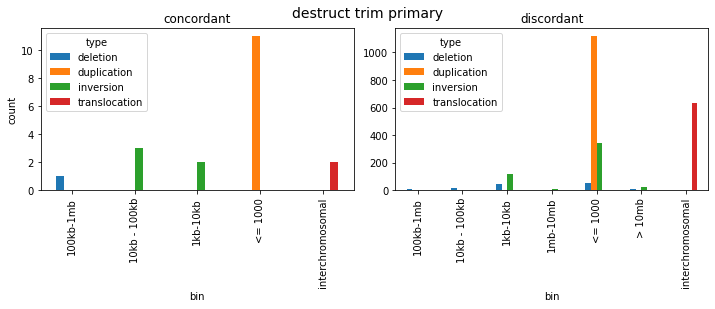

In [48]:
pdf = matplotlib.backends.backend_pdf.PdfPages("destruct_type_size.pdf")
f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("destruct_raw", ax[0], ax[1], f, title="destruct raw")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("destruct_primary", ax[0], ax[1], f, title="destruct primary")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("destruct_trim", ax[0], ax[1], f, title="destruct trim")
pdf.savefig(f)

f, ax = plt.subplots(1, 2, figsize=(10, 3))
type_plot("destruct_trim_primary", ax[0], ax[1], f, title="destruct trim primary")
pdf.savefig(f)

pdf.close()

In [45]:

def bin(r):
    if r.chromosome_1 != r.chromosome_2:
        return "interchromosomal"
    else:
        l =  r.position_2 - r.position_1  
        if l <= 1000:
            return "<= 1000" 
        if l > 1000 and l <= 10000:
            return "1kb-10kb" 
        if l > 10000 and l <= 100000:
            return "10kb - 100kb" 
        if l > 100000 and l <= 1000000:
            return "100kb-1mb" 
        if l > 1000000 and l <= 10000000:
            return "1mb-10mb" 
        if l > 10000000:
            return "> 10mb" 
        else:
            print(l)
            return "?"
        
def type_plot(matched, ax1, ax2, fig, title="", csv=True):
    
    fig.suptitle(title, fontsize=14)
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    
    if csv:
        matched = read_matched_data(matched)
    
    print(len(matched))
    matches = get_concordant_svs(matched)
    non_matches = get_discordant_svs(matched)
    
    if len(matches) > 0:
        matches["bin"] = matches.apply(lambda row: bin(row), axis=1)
        matches=matches.groupby(["bin", "type"]).size().reset_index(name="count")
        matches.pivot("bin", "type", "count").plot(kind='bar', ax=ax1)

    if len(non_matches) > 0:
        non_matches["bin"] = non_matches.apply(lambda row: bin(row), axis=1)
        non_matches=non_matches.groupby(["bin", "type"]).size().reset_index(name="count")
        non_matches.pivot("bin", "type", "count").plot(kind='bar', ax=ax2)

    ax1.set_ylabel("count")
    ax1.set_title("concordant")
    ax2.set_title("discordant")
    
